In [1]:
import numpy as np
import random
import seaborn as sns
import contextily as cx
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

import os
import re
import csv
import json

import rfpimp

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot


import warnings
warnings.filterwarnings("ignore")

In [2]:
BEI_variables_cleaned = gpd.read_file('BEI_Cleaned.shp')

In [3]:
BEI_variables_cleaned.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

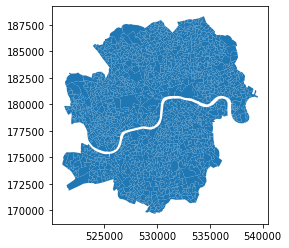

In [4]:
BEI_variables_cleaned.plot()

In [5]:
BEI_variables_cleaned['Youth(<18)_norm'] = BEI_variables_cleaned['Youth(<18)']/BEI_variables_cleaned['Area(m^2)']
BEI_variables_cleaned['Elderly(>6_norm'] = BEI_variables_cleaned['Elderly(>6']/BEI_variables_cleaned['Area(m^2)']
BEI_variables_cleaned['No_car_hou_norm'] = BEI_variables_cleaned['No_car_hou']/BEI_variables_cleaned['Area(m^2)']
BEI_variables_cleaned['Minority_p_norm'] = BEI_variables_cleaned['Minority_p']/BEI_variables_cleaned['Area(m^2)']
BEI_variables_cleaned['Unemployed_norm'] = BEI_variables_cleaned['Unemployed']/BEI_variables_cleaned['Area(m^2)']

In [6]:
BEI_variables_cleaned

LSOA11CD             LSOA11NM  Youth(<18)  Elderly(>6  No_car_hou  \
0     E01000001  City of London 001A       122.0       268.0       519.0   
1     E01000002  City of London 001B       154.0       269.0       481.0   
2     E01000003  City of London 001C       137.0       254.0       655.0   
3     E01000005  City of London 001E       182.0       127.0       356.0   
4     E01000842          Camden 011A       205.0       201.0       353.0   
...         ...                  ...         ...         ...         ...   
1412  E01033709         Hackney 027H       270.0        76.0       629.0   
1413  E01033710         Hackney 028E       308.0        30.0       359.0   
1414  E01033711         Hackney 027I        91.0        37.0       388.0   
1415  E01033712         Hackney 023G       319.0        53.0       441.0   
1416  E01033713         Hackney 010G       274.0        68.0       429.0   

      Minority_p  Unemployed  Area(m^2)  \
0          228.0        97.0     133370   
1          162.0        82.0     226274   
2          291.0       231.0      57324   
3          480.0       274.0     190808   
4          275.0       170.0     103740   
...          ...         ...        ...   
1412       741.0       392.0      87009   
1413       579.0       281.0      41406   
1414       401.0       335.0      77928   
1415       627.0       407.0     162825   
1416       636.0       396.0     261553   

                                               geometry  Youth(<18)_norm  \
0     POLYGON ((532105.092 182011.230, 532162.491 18...         0.000915   
1     POLYGON ((532746.813 181786.891, 532671.688 18...         0.000681   
2     POLYGON ((532135.145 182198.119, 532158.250 18...         0.002390   
3     POLYGON ((533807.946 180767.770, 533649.063 18...         0.000954   
4     POLYGON ((527317.841 184750.587, 527357.075 18...         0.001976   
...                                                 ...              ...   
1412  POLYGON ((532726.570 183211.594, 532719.197 18...         0.003103   
1413  POLYGON ((535485.625 186863.250, 535487.798 18...         0.007439   
1414  POLYGON ((533056.000 182962.000, 533055.000 18...         0.001168   
1415  POLYGON ((534776.000 183995.000, 534809.638 18...         0.001959   
1416  POLYGON ((534918.108 185913.311, 534885.850 18...         0.001048   

      Elderly(>6_norm  No_car_hou_norm  Minority_p_norm  Unemployed_norm  
0            0.002009         0.003891         0.001710         0.000727  
1            0.001189         0.002126         0.000716         0.000362  
2            0.004431         0.011426         0.005076         0.004030  
3            0.000666         0.001866         0.002516         0.001436  
4            0.001938         0.003403         0.002651         0.001639  
...               ...              ...              ...              ...  
1412         0.000873         0.007229         0.008516         0.004505  
1413         0.000725         0.008670         0.013983         0.006786  
1414         0.000475         0.004979         0.005146         0.004299  
1415         0.000326         0.002708         0.003851         0.002500  
1416         0.000260         0.001640         0.002432         0.001514  

[1417 rows x 14 columns]

In [7]:
print(BEI_variables_cleaned.columns.tolist())


['LSOA11CD', 'LSOA11NM', 'Youth(<18)', 'Elderly(>6', 'No_car_hou', 'Minority_p', 'Unemployed', 'Area(m^2)', 'geometry', 'Youth(<18)_norm', 'Elderly(>6_norm', 'No_car_hou_norm', 'Minority_p_norm', 'Unemployed_norm']


In [8]:
BEI_variables_final = BEI_variables_cleaned

In [9]:
to_drop = ['Youth(<18)', 'Elderly(>6', 'No_car_hou', 'Minority_p', 'Unemployed', 'Area(m^2)']
BEI_variables_final = BEI_variables_final.drop(columns=to_drop)
BEI_variables_final.head(2)

LSOA11CD             LSOA11NM  \
0  E01000001  City of London 001A   
1  E01000002  City of London 001B   

                                            geometry  Youth(<18)_norm  \
0  POLYGON ((532105.092 182011.230, 532162.491 18...         0.000915   
1  POLYGON ((532746.813 181786.891, 532671.688 18...         0.000681   

   Elderly(>6_norm  No_car_hou_norm  Minority_p_norm  Unemployed_norm  
0         0.002009         0.003891         0.001710         0.000727  
1         0.001189         0.002126         0.000716         0.000362

In [10]:
import numpy as np
from scipy import stats

In [11]:
print ("\nZ-score for arr1 : \n", stats.zscore(BEI_variables_final['Youth(<18)_norm']))


Z-score for arr1 : 
 0      -1.101125
1      -1.234276
2      -0.262287
3      -1.078897
4      -0.497605
          ...   
1412    0.143267
1413    2.608539
1414   -0.957262
1415   -0.507236
1416   -1.025587
Name: Youth(<18)_norm, Length: 1417, dtype: float64


In [12]:
BEI_variables_final['z_score_youth'] = stats.zscore(BEI_variables_final['Youth(<18)_norm'])
BEI_variables_final['z_score_elderly'] = stats.zscore(BEI_variables_final['Elderly(>6_norm'])
BEI_variables_final['z_score_nocar'] = stats.zscore(BEI_variables_final['No_car_hou_norm'])
BEI_variables_final['z_score_Minor'] = stats.zscore(BEI_variables_final['Minority_p_norm'])
BEI_variables_final['z_score_unemployed'] = stats.zscore(BEI_variables_final['Unemployed_norm'])

In [13]:
BEI_variables_ind = BEI_variables_final

BEI_i = E_i + Y_i + C_i + M_i + L_i

In [14]:
BEI_variables_ind['z_score_youth_zero'] = [0 if i < 0 else i for i in BEI_variables_ind['z_score_youth']]
BEI_variables_ind['z_score_elderly_zero'] = [0 if i < 0 else i for i in BEI_variables_ind['z_score_elderly']]
BEI_variables_ind['z_score_nocar_zero'] = [0 if i < 0 else i for i in BEI_variables_ind['z_score_nocar']]
BEI_variables_ind['z_score_Minor_zero'] = [0 if i < 0 else i for i in BEI_variables_ind['z_score_Minor']]
BEI_variables_ind['z_score_unemployed_zero'] = [0 if i < 0 else i for i in BEI_variables_ind['z_score_unemployed']]

In [15]:
BEI_variables_ind['BEI_ind'] = BEI_variables_ind['z_score_youth_zero'] + BEI_variables_ind['z_score_elderly_zero'] + BEI_variables_ind['z_score_nocar_zero'] + BEI_variables_ind['z_score_Minor_zero'] + BEI_variables_ind['z_score_unemployed_zero']

In [16]:
import statistics
one_std = statistics.stdev(BEI_variables_ind['BEI_ind'])
one_std

3.0971127754433745

<AxesSubplot:xlabel='BEI_ind', ylabel='Density'>

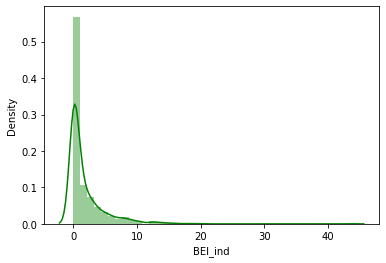

In [17]:
sns.distplot(BEI_variables_ind['BEI_ind'], bins = 40,color='green')

In [18]:
trip_7domain = gpd.read_file('trip_with_factors_good.shp')

In [19]:
trip_7domain = trip_7domain.to_crs("epsg:27700")


In [20]:
BEI_variables_ind['BEI_ind_zs'] = stats.zscore(BEI_variables_final['BEI_ind'])

In [21]:
min_zs = BEI_variables_ind['BEI_ind_zs'].min()

In [22]:
BEI_variables_ind['BEI_ind_zs']

0      -0.278209
1      -0.585309
2       1.775032
3      -0.585309
4      -0.307861
          ...   
1412    0.209544
1413    1.900445
1414   -0.352280
1415   -0.585309
1416   -0.585309
Name: BEI_ind_zs, Length: 1417, dtype: float64

<AxesSubplot:>

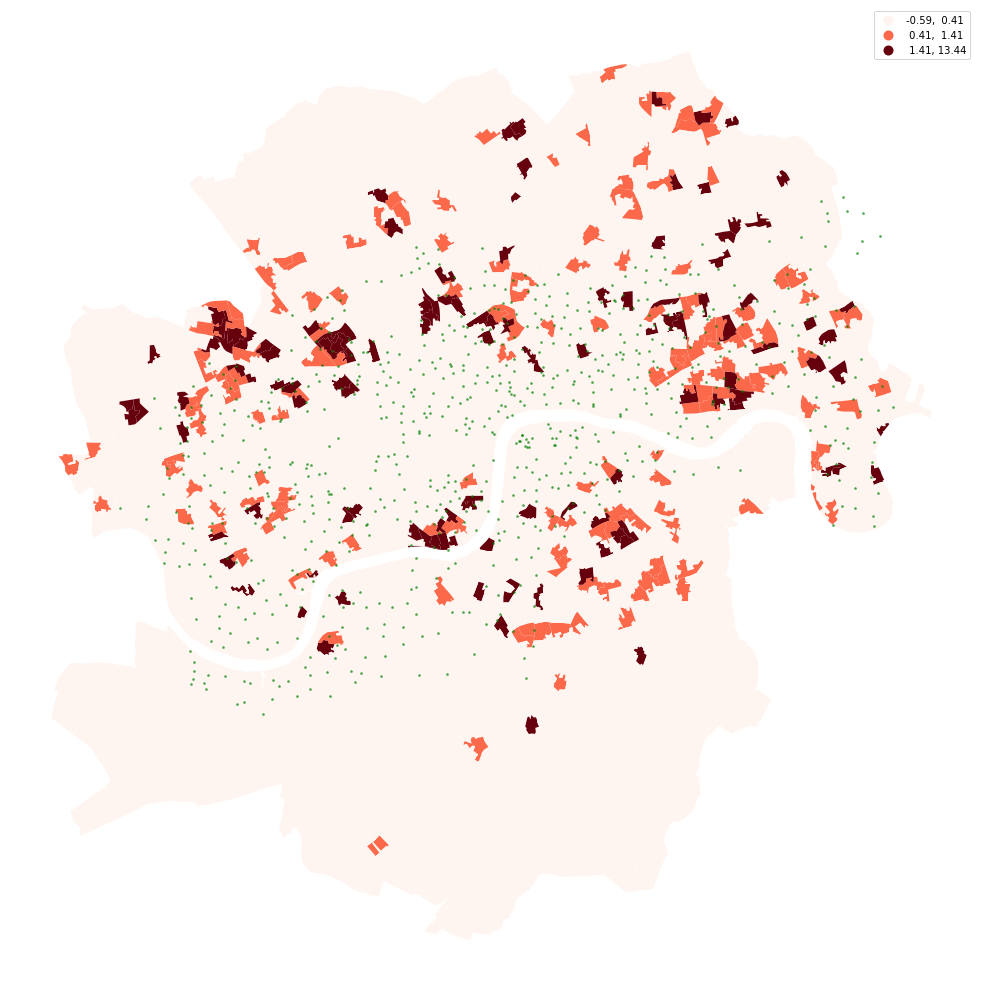

In [23]:
f, ax = plt.subplots(figsize=(18, 18))


BEI_variables_ind.plot(ax=ax, column='BEI_ind_zs', legend=True, figsize=(8,8),scheme='user_defined', classification_kwds={'bins':[min_zs+1,min_zs+2]}, cmap="Reds");
#'boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'
#BEI_variables_ind.plot(ax=ax, column='BEI_ind', legend=True, figsize=(8,8),scheme='jenkscaspallsampled', cmap="Reds");
ax.axis("off")

trip_7domain.plot(ax=ax, marker="*", color="green", markersize=5, alpha=0.5)

In [24]:
trip_7domain['buffer200'] = trip_7domain.geometry.buffer(200)

0 - 1 STD = Low demand  <br />
1 -2 STD = Med demand  <br />
2+ STD = High demand 


<AxesSubplot:>

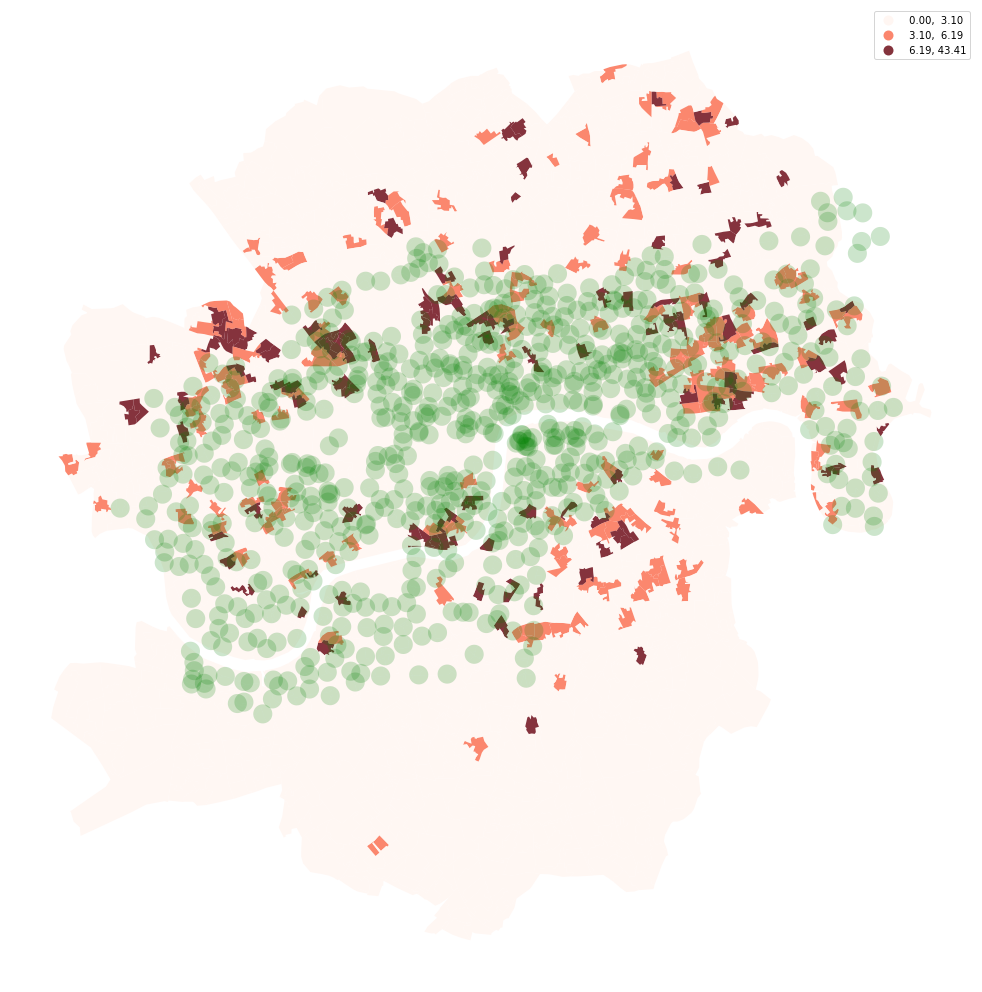

In [25]:
f, ax = plt.subplots(figsize=(18, 18))


BEI_variables_ind.plot(ax=ax, column='BEI_ind', 
                       legend=True, figsize=(8,8),scheme='user_defined', 
                       classification_kwds={'bins':[one_std,one_std*2]}, 
                       cmap="Reds",alpha=0.8);
ax.axis("off")

trip_7domain['buffer200'].plot(ax=ax,color="green", alpha=0.2)

### merge all buffers

In [26]:
list_of_single_column = trip_7domain['buffer200'].tolist()

In [27]:
from shapely.geometry import shape
from shapely.ops import unary_union

union = unary_union([shape(s.__geo_interface__) for s in trip_7domain['buffer200']])

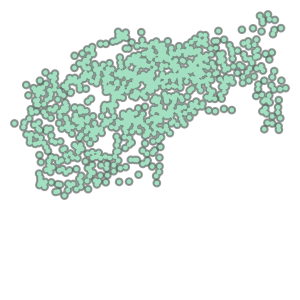

In [28]:
union

### calculate overlapped area for each LSOA

In [29]:
BEI_variables_ind['geometry']

0       POLYGON ((532105.092 182011.230, 532162.491 18...
1       POLYGON ((532746.813 181786.891, 532671.688 18...
2       POLYGON ((532135.145 182198.119, 532158.250 18...
3       POLYGON ((533807.946 180767.770, 533649.063 18...
4       POLYGON ((527317.841 184750.587, 527357.075 18...
                              ...                        
1412    POLYGON ((532726.570 183211.594, 532719.197 18...
1413    POLYGON ((535485.625 186863.250, 535487.798 18...
1414    POLYGON ((533056.000 182962.000, 533055.000 18...
1415    POLYGON ((534776.000 183995.000, 534809.638 18...
1416    POLYGON ((534918.108 185913.311, 534885.850 18...
Name: geometry, Length: 1417, dtype: geometry

In [30]:
BEI_variables_ind['overlap%'] = 0.00

In [31]:
BEI_variables_ind['geometry'][0].area

133320.76877877172

In [32]:
union.intersection(BEI_variables_ind['geometry'][0]).area

131956.39388384562

In [33]:
len(BEI_variables_ind)

1417

In [34]:
from shapely.geometry import box



# find intersection of rectangles (probably a more elegant way to do this)
for i in range(0,1417):
    #print(f'{i}')
    this_area = BEI_variables_ind['geometry'][i].area
    this_overlap = union.intersection(BEI_variables_ind['geometry'][i]).area
    this_overlap_per = (this_overlap/this_area)*100
    BEI_variables_ind['overlap%'][i] = this_overlap_per

    
#(g1.intersection(g8).area/g1.area)*100

In [35]:
BEI_variables_ind['overlap%']

0        98.976622
1        99.977214
2       100.000000
3        90.809420
4         0.000000
           ...    
1412     99.428529
1413      0.000000
1414     98.359112
1415     67.373805
1416      0.000000
Name: overlap%, Length: 1417, dtype: float64

<AxesSubplot:>

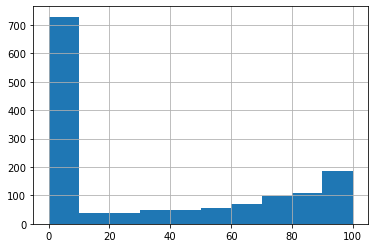

In [36]:
BEI_variables_ind['overlap%'].hist()

<AxesSubplot:>

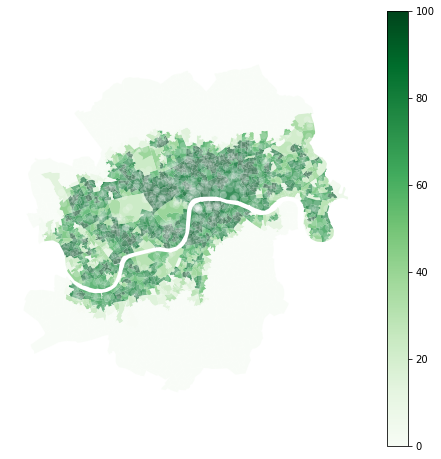

In [37]:
f, ax = plt.subplots(figsize=(8, 8))


BEI_variables_ind.plot(ax=ax, column='overlap%', 
                       legend=True, figsize=(8,8), 
                       cmap="Greens",alpha=0.8);

ax.axis("off")

trip_7domain['buffer200'].plot(ax=ax,color="white", alpha=0.2)

In [38]:
print(BEI_variables_ind.columns.tolist())

['LSOA11CD', 'LSOA11NM', 'geometry', 'Youth(<18)_norm', 'Elderly(>6_norm', 'No_car_hou_norm', 'Minority_p_norm', 'Unemployed_norm', 'z_score_youth', 'z_score_elderly', 'z_score_nocar', 'z_score_Minor', 'z_score_unemployed', 'z_score_youth_zero', 'z_score_elderly_zero', 'z_score_nocar_zero', 'z_score_Minor_zero', 'z_score_unemployed_zero', 'BEI_ind', 'BEI_ind_zs', 'overlap%']


In [258]:
BEI_dem_cov = BEI_variables_ind

In [259]:
to_drop = ['Youth(<18)_norm', 'Elderly(>6_norm', 'No_car_hou_norm', 'Minority_p_norm', 'Unemployed_norm', 'z_score_youth',
           'z_score_elderly', 'z_score_nocar', 'z_score_Minor', 'z_score_unemployed',
          'z_score_youth_zero', 'z_score_elderly_zero', 'z_score_nocar_zero', 'z_score_Minor_zero', 'z_score_unemployed_zero', 'BEI_ind_zs']
#'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ'
BEI_dem_cov = BEI_dem_cov.drop(columns=to_drop)
BEI_dem_cov.head(2)

LSOA11CD             LSOA11NM  \
0  E01000001  City of London 001A   
1  E01000002  City of London 001B   

                                            geometry   BEI_ind   overlap%  
0  POLYGON ((532105.092 182011.230, 532162.491 18...  0.950788  98.976622  
1  POLYGON ((532746.813 181786.891, 532671.688 18...  0.000000  99.977214

In [260]:
BEI_dem_cov['uncovered%'] = 100 - BEI_dem_cov['overlap%']

In [261]:
BEI_dem_cov.head(2)

LSOA11CD             LSOA11NM  \
0  E01000001  City of London 001A   
1  E01000002  City of London 001B   

                                            geometry   BEI_ind   overlap%  \
0  POLYGON ((532105.092 182011.230, 532162.491 18...  0.950788  98.976622   
1  POLYGON ((532746.813 181786.891, 532671.688 18...  0.000000  99.977214   

   uncovered%  
0    1.023378  
1    0.022786

In [262]:
BEI_dem_cov.loc[BEI_dem_cov['LSOA11CD'] == 'E01004723']

LSOA11CD          LSOA11NM  \
1281  E01004723  Westminster 005F   

                                               geometry  BEI_ind  overlap%  \
1281  POLYGON ((524761.839 182998.001, 524838.620 18...  5.32308       0.0   

      uncovered%  
1281       100.0

Categorize LSOA based on coverage and BEI

In [351]:
BEI_cat = BEI_dem_cov

In [352]:
BEI_cat['var1'] = ""
BEI_cat['var2'] = ""

In [355]:
for row in range(0,1417):
    if BEI_cat['BEI_ind'][row] >= one_std*2:
        BEI_cat['var1'][row] = 3
    elif BEI_cat['BEI_ind'][row] < one_std*2 and BEI_cat['BEI_ind'][row] >= one_std*1:
        BEI_cat['var1'][row] = 2
    elif BEI_cat['BEI_ind'][row] < one_std:
        BEI_cat['var1'][row] = 1

In [356]:
for row in range(0,1417):
    if BEI_cat['overlap%'][row] >= 75:
        BEI_cat['var2'][row] = 'C'
    elif BEI_cat['overlap%'][row] < 75 and BEI_cat['overlap%'][row] >= 25:
        BEI_cat['var2'][row] = 'B'
    elif BEI_cat['overlap%'][row] < 25:
        BEI_cat['var2'][row] = 'A'

In [357]:
BEI_cat["bi_var"] = BEI_cat["var1"].astype(str) + BEI_cat["var2"]

In [360]:
BEI_dem_cov.to_file('BEI_dem_cov.shp')

In [371]:
biv_Palette = {'1A': '#e2e2e2', '1B': '#a4b7ce', '1C': '#678bbb',
               '2A': '#dcb1b1', '2B': '#a08fa1', '2C': '#646d93',
               '3A': '#d67c7c', '3B': '#9b6471', '3C': '#614d67'}


biv_Palette

{'1A': '#e2e2e2',
 '1B': '#a4b7ce',
 '1C': '#678bbb',
 '2A': '#dcb1b1',
 '2B': '#a08fa1',
 '2C': '#646d93',
 '3A': '#d67c7c',
 '3B': '#9b6471',
 '3C': '#614d67'}

In [372]:
import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd

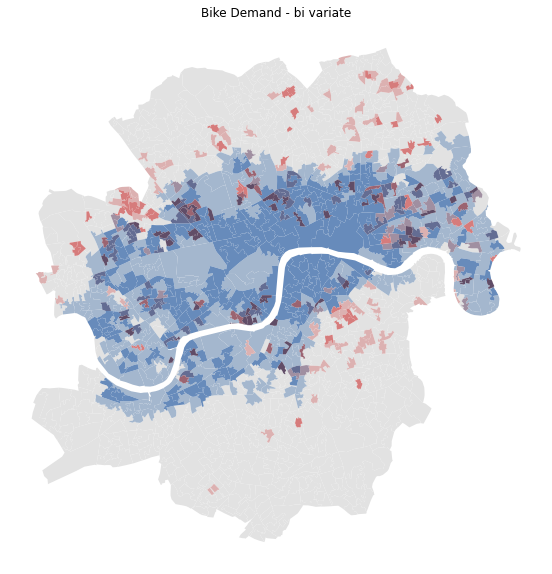

In [378]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in BEI_dem_cov.groupby('bi_var'):
    
    # Define the color for each group using the dictionary
    color = biv_Palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.set(title='Bike Demand - bi variate')

ax.set_axis_off()
plt.show()

In [376]:
biv_Palette2 = {'1A': '#e2e2e2', '1B': '#a4b7ce', '1C': '#678bbb',
               '2A': '#dcb1b1', '2B': '#e2e2e2', '2C': '#a4b7ce',
               '3A': '#d67c7c', '3B': '#dcb1b1', '3C': '#e2e2e2'}


biv_Palette2

{'1A': '#e2e2e2',
 '1B': '#a4b7ce',
 '1C': '#678bbb',
 '2A': '#dcb1b1',
 '2B': '#e2e2e2',
 '2C': '#a4b7ce',
 '3A': '#d67c7c',
 '3B': '#dcb1b1',
 '3C': '#e2e2e2'}

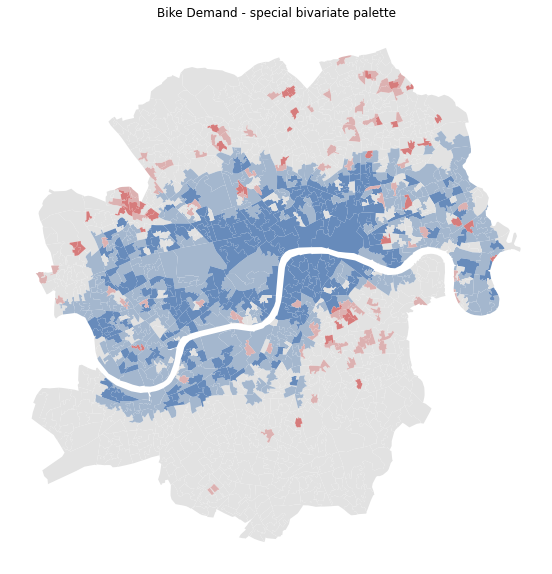

In [379]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in BEI_dem_cov.groupby('bi_var'):
    
    # Define the color for each group using the dictionary
    color = biv_Palette2[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.set(title='Bike Demand - special bivariate palette')

ax.set_axis_off()
plt.show()

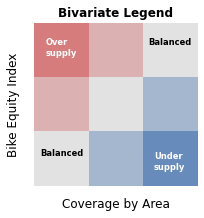

In [533]:
##### import matplotlib
import matplotlib.pyplot as plt

colors = '#e2e2e2 #dcb1b1 #d67c7c #a4b7ce #678bbb'.split()
cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

m = [
    [2, 1, 0],
    [1, 0, 3],
    [0, 3, 4],
]
fig, ax = plt.subplots(figsize=(3,3))

plt.imshow(m, cmap=cmap)
plt.title('Bivariate Legend', size='large', fontweight ="bold")

ax.axis('off')


plt.text(0 , 2.9, "Coverage by Area", horizontalalignment='left', size='large', color='black')
plt.text(-1 , 1.9, "Bike Equity Index", horizontalalignment='left', size='large', color='black',rotation=90)

plt.text(-0.3 , -0.1, "Over", horizontalalignment='left', size='small', color='white', fontweight ="bold")
plt.text(-0.3 , 0.1, "supply", horizontalalignment='left', size='small', color='white', fontweight ="bold")


plt.text(1.7, 2, "Under", horizontalalignment='left', size='small', color='white', fontweight ="bold")
plt.text(1.7, 2.2, "supply", horizontalalignment='left', size='small', color='white', fontweight ="bold")

plt.text(-0.4, 1.95, "Balanced", horizontalalignment='left', size='small', color='black', fontweight ="semibold")
plt.text(1.6, -0.1, "Balanced", horizontalalignment='left', size='small', color='black', fontweight ="semibold")

plt.show()


## Bivariate map

In [43]:
import libpysal as lp
from libpysal import examples
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline


In [130]:
x = BEI_dem_cov['BEI_ind'].values
y = BEI_dem_cov['overlap%'].values


In [131]:
from splot.mapping import vba_choropleth

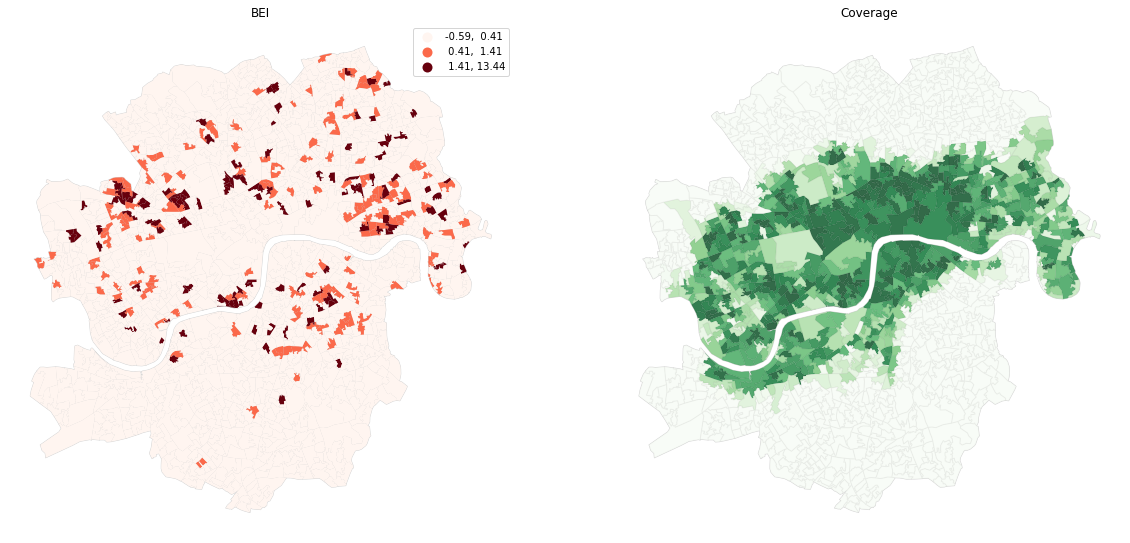

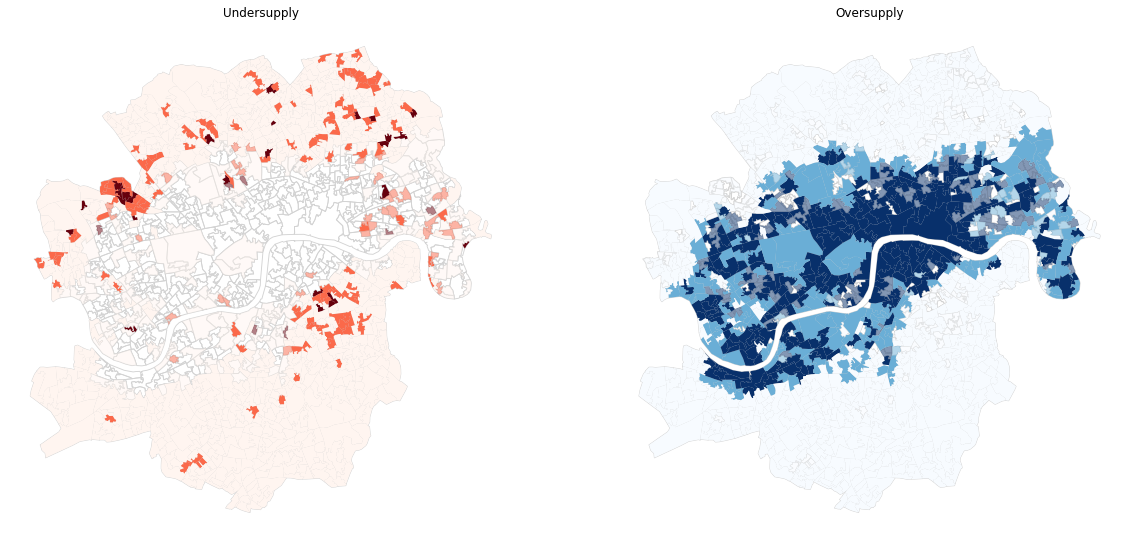

In [338]:
# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

BEI_dem_cov.plot(ax=axs[0], edgecolor="lightgrey", facecolor="none", linewidth=0.9)
BEI_variables_ind.plot(ax=axs[0], column='BEI_ind_zs', legend=True, figsize=(8,8),scheme='user_defined', classification_kwds={'bins':[min_zs+1,min_zs+2]}, cmap="Reds");

BEI_dem_cov.plot(ax=axs[1], edgecolor="lightgrey", facecolor="none", linewidth=0.9)
BEI_variables_ind.plot(ax=axs[1], column='overlap%',
                       cmap="Greens",alpha=0.8);

# set figure style
axs[0].set_title('BEI')
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[1].set_title('Coverage')






# plot
plt.show()

# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

BEI_dem_cov.plot(ax=axs[0], edgecolor="lightgrey", facecolor="none", linewidth=0.9)

# set revert_alpha argument to True
vba_choropleth(x, y, BEI_dem_cov, rgb_mapclassify=dict(classifier='fisher_jenks',k=3),
               alpha_mapclassify=dict(classifier='fisher_jenks',k=3),
               cmap='Reds', ax=axs[0],
               revert_alpha = True)


BEI_dem_cov.plot(ax=axs[1], edgecolor="lightgrey", facecolor="none", linewidth=0.9)

# create a vba_choropleth
vba_choropleth(y, x, BEI_dem_cov, rgb_mapclassify=dict(classifier='fisher_jenks',k=3),
               alpha_mapclassify=dict(classifier='fisher_jenks',k=3),
               cmap='Blues', ax=axs[1],
               revert_alpha=True)






# set figure style
axs[1].set_title('Oversupply')
axs[0].set_title('Undersupply')

# plot
plt.show()

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

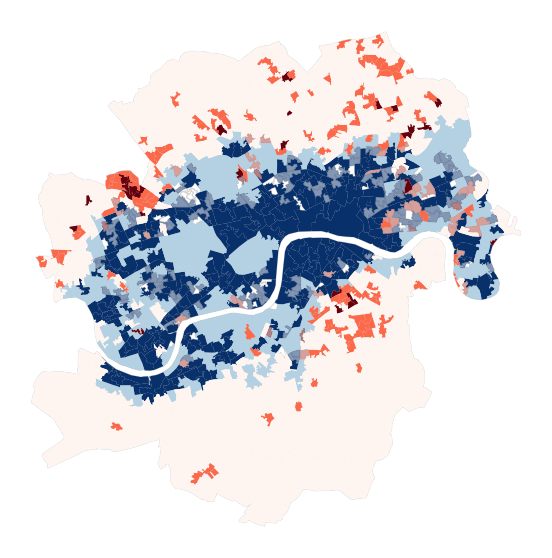

In [340]:
# Create new figure
fig, axs = plt.subplots(figsize=(20,10))

BEI_dem_cov.plot(ax=axs, edgecolor="lightgrey", facecolor="none", linewidth=0.9)

# set revert_alpha argument to True

vba_choropleth(y, x, BEI_dem_cov, rgb_mapclassify=dict(classifier='fisher_jenks',k=3),
               alpha_mapclassify=dict(classifier='natural_breaks',k=3),
               cmap='Blues', ax=axs,
               revert_alpha = True)
vba_choropleth(x, y, BEI_dem_cov, rgb_mapclassify=dict(classifier='fisher_jenks',k=3),
               alpha_mapclassify=dict(classifier='natural_breaks',k=3),
               cmap='Reds', ax=axs,
               revert_alpha = True)